In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Train.csv")
# print(df)
df.describe()

df = df.values

In [3]:
Y = df[:,5]
print(Y)

[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [4]:
X = df[:,0:5]
print(X)

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


In [5]:
u = np.mean(X, axis = 0)
std = np.std(X, axis=0)
X = (X-u)/std
print(X)

[[ 0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [-0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 ...
 [ 1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223]
 [-1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908]
 [-1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738]]


In [6]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X)

[[ 1.          0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [ 1.         -0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 1.          0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 ...
 [ 1.          1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223]
 [ 1.         -1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908]
 [ 1.         -1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738]]


In [18]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y - y_)**2)
    
    return -e/m

def gradient(X,y,theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T , (y-y_))
    m = X.shape[0]
    return grad/m

def gradientDescent(X,y,learningRate=0.1,maxIters=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    errorList = []
    
    for i in range(maxIters):
        e = error(X,y,theta)
        errorList.append(e)
        grad = gradient(X,y,theta)
        theta = theta - learningRate*grad
        
    return theta,errorList

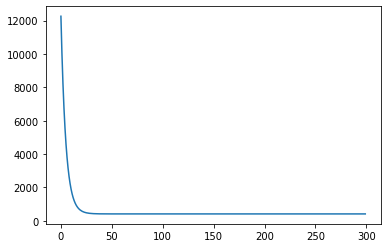

[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]
[12256.130414032896, 10026.033684143073, 8217.05525281762, 6749.466627013956, 5558.673187089289, 4592.334067473993, 3808.0315657917154, 3171.3849608951386, 2654.523779945838, 2234.85183834815, 1894.04653113265, 1617.2484830009766, 1392.4052530232816, 1209.7397313936942, 1061.3194764678278, 940.7077762355075, 842.6808858642626, 762.9988586786471, 698.2197865343776, 645.5492057333446, 602.7179942368198, 567.8833559297996, 539.5485154072411, 516.4975785302777, 497.742687289827, 482.48114259194153, 470.06060992121974, 459.95088023812474, 451.7209479296336, 445.0204021068502, 439.5643175010901, 435.12098512481214, 431.5019475920107, 428.5539050830668, 426.15213988278555, 424.1951738531029, 422.60042706729115, 421.3006895139443, 420.2412532069083, 419.3775807751255, 418.67340992065016, 418.0992120500355, 417.63093873539134, 417.24900212055684, 416.9374455012189, 416.68326851820393, 416.475878069587, 416.30664146076725,

In [19]:
theta , error_list = gradientDescent(X,Y)
plt.plot(error_list)
plt.show()
print(theta)
print(error_list)

In [23]:
X_Test = pd.read_csv("Test.csv").values
print(X_Test)

[[ 1.01525387e+00  2.07620944e+00 -2.66434820e-01 -2.41808820e+00
  -9.80502790e-01]
 [-3.75021204e-01  9.53184528e-01  6.26719138e-01  7.04405750e-01
  -3.55489211e-01]
 [-1.02445225e+00  9.62991107e-01 -4.07942004e-01 -1.86127383e+00
   4.55201351e-01]
 ...
 [ 5.54727647e-01  1.76824345e+00 -8.97787210e-01 -1.19366107e+00
   3.40563374e-01]
 [-1.62717246e+00  8.56470994e-01 -5.65729519e-04  6.29386649e-01
   4.53382144e-01]
 [ 1.39310499e-01  5.31597186e-01 -8.53107053e-01  3.16920076e-02
   1.71489304e+00]]


In [25]:
ones = np.ones((X_Test.shape[0],1))
X_Test = np.hstack((ones,X_Test))

In [26]:
Y_Test = hypothesis(X_Test, theta)

In [27]:
df = pd.DataFrame(data = Y_Test , columns = ["target"])
df.to_csv("Y_Prediction.csv",index = True, index_label = "Id")
print(df)

         target
0    112.151684
1    115.879768
2    -25.876262
3    -47.635840
4   -102.517982
..          ...
395  -88.148510
396 -194.762401
397  123.081573
398   62.994783
399   53.281684

[400 rows x 1 columns]
